<a href="https://colab.research.google.com/github/simranjita/Hybrid/blob/master/CEST_Ext_LSTM%2Bpca_and_lpp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from math import sqrt
from numpy import concatenate

from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import numpy as np
from pandas import read_csv

from datetime import datetime

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/My Drive"

 Book1.xlsx  'Colab Notebooks'	 Share	 Sir


In [ ]:
dataset = read_csv(r'/content/drive/My Drive/Share/input/snv.csv')


In [ ]:
classes = read_csv(r"/content/drive/My Drive/Share/input/skimmed_classes.csv",header=None)

In [ ]:
import numpy as np
dataset=np.array(dataset)
classes=np.array(classes)
X=dataset



In [ ]:
from sklearn.decomposition import PCA
X=dataset
Xpca = PCA(n_components=1000).fit_transform(X)


In [ ]:
import pyorient
from lpproj import LocalityPreservingProjection
lpp = LocalityPreservingProjection(n_components=1000,
               neighbors_algorithm='auto', weight='adjacency',
               weight_width=1.0)
LPP = lpp.fit_transform(X)


In [ ]:
ze=np.zeros([1,1000])
lppo=np.concatenate([ze,LPP],axis=0)
lppo.shape
pcao=np.concatenate([ze,Xpca],axis=0)

In [ ]:
np.savetxt("/content/drive/My Drive/Share/lpp1000.csv",lppo,delimiter=",")

In [ ]:
np.savetxt("/content/drive/My Drive/Share/pca1000.csv",pcao,delimiter=",")

In [ ]:
dataset=np.concatenate([pcao, lppo],axis=1)

In [ ]:
LPP = read_csv(r'/content/drive/My Drive/Share/lpp1000.csv')
Xpca=read_csv(r'/content/drive/My Drive/Share/pca1000.csv')
dataset=np.concatenate([Xpca, LPP],axis=1)

In [ ]:
dataset.shape

(19036, 2000)

In [ ]:
dataset=np.array(dataset)
classes=np.array(classes)
coarse=classes[:,0]
coarse= coarse[:, None]
 
clay=classes[:,1]
clay= clay[:,None]
 
silt=classes[:,2]
silt= silt[:,None]
 
sand=classes[:,3]
sand= sand[:,None]
 
phcacl2=classes[:,4]
phcacl2= phcacl2[:,None]
 
ph20=classes[:,5]
ph20= ph20[:,None]
 
oc=classes[:,6]
oc= oc[:,None]
 
caco3=classes[:,7]
caco3= caco3[:,None]
 
nitrogen=classes[:,8]  
nitrogen= nitrogen[:,None]
 
phos=classes[:,9]
phos= phos[:,None]
 
potash=classes[:,10]
potash= potash[:,None]
      
cec=classes[:,11]
cec= cec[:,None]
 



In [ ]:
mineral=oc
 

In [ ]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(dataset, mineral, test_size=0.25, random_state=42)
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape,test_y.shape)



(14277, 1, 2000) (14277, 1) (4759, 1, 2000) (4759, 1)


In [ ]:

model = Sequential()
model.add(LSTM(2500, input_shape=(train_X.shape[1], train_X.shape[2]), dropout=0.1))
model.add(Dense(1))

model.compile(loss='mae', optimizer='adam')
model.summary()
# fit network

history=model.fit(train_X, train_y, epochs=100, batch_size=100, 
                    verbose=1,validation_split=0.25,
                    shuffle=False)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 2500)              45010000  
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 2501      
Total params: 45,012,501
Trainable params: 45,012,501
Non-trainable params: 0
_________________________________________________________________
Train on 10707 samples, validate on 3570 samples
Epoch 1/100
10707/10707 [==============================] - 11s 1ms/step - loss: 38.0455 - val_loss: 25.6045
Epoch 2/100
10707/10707 [==============================] - 6s 601us/step - loss: 25.5023 - val_loss: 19.9814
Epoch 3/100
10707/10707 [==============================] - 6s 601us/step - loss: 20.8070 - val_loss: 16.7101
Epoch 4/100
10707/10707 [==============================] - 6s 594us/step - loss: 17.8286 - val_loss: 14.5022
Epoch 5/100
10707/10707 [=================

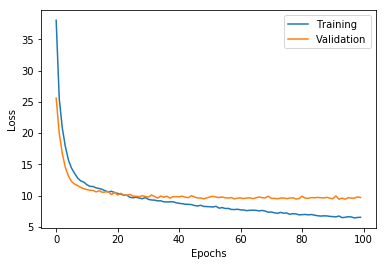

In [ ]:
from matplotlib import pyplot as plt
# summarize history for loss

pyplot.plot(history.history['loss'], label='Training')
pyplot.plot(history.history['val_loss'], label='Validation')
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend()
plt.draw()
plt.savefig("/content/drive/My Drive/Share/oc1.png",dpi=400)
plt.show()

In [ ]:
yhat = model.predict(test_X)
r_rmse = sqrt(mean_squared_error(test_y,yhat))
print('Test RMSE: %.3f' % r_rmse)
from sklearn.metrics import r2_score
from scipy.stats import kendalltau
from scipy.stats import spearmanr
from sklearn.metrics import mean_absolute_error
r_kendalcoef, p = kendalltau(test_y,yhat)

r_spearmancoef1, p1 = spearmanr(test_y,yhat)
r_mae=mean_absolute_error(test_y, yhat)
r_r2=r2_score(test_y, yhat)
print('Test R2: %.3f' % r_r2)



Test RMSE: 20.033
Test R2: 0.951


In [ ]:
loss=history.history['loss']
val_loss=history.history['val_loss']
loss=np.array(loss)
loss=loss[:,None]
val_loss=np.array(val_loss)
val_loss=val_loss[:,None]
zzloss=np.concatenate([loss, val_loss], axis=1)
np.savetxt("/content/drive/My Drive/Share/oc1-loss.csv", zzloss, delimiter=",")



In [ ]:
zresult=np.vstack([r_kendalcoef,r_mae,r_r2,r_rmse, r_spearmancoef1])

np.savetxt("/content/drive/My Drive/Share/oc1-results.csv", zresult, delimiter=",")


In [ ]:
residual=test_y-yhat
zzyhatest=np.concatenate([yhat,test_y,residual],axis=1)

np.savetxt("/content/drive/My Drive/Share/oc1-yhattest.csv", zzyhatest, delimiter=",")



In [ ]:
! pip install pyorient
! pip install lpproj

     |████████████████████████████████| 71kB 3.1MB/s 
  Created wheel for pyorient: filename=pyorient-1.5.5-cp36-none-any.whl size=79054 sha256=cd66c0a36fcf6e5d8068daa66b38440d576adf3cb202278f2c04d1ecd58792c1
  Stored in directory: /root/.cache/pip/wheels/e4/e3/fa/7767bf3473c9a04d04cb655d1a5560b7183b1fb2df015cd861
Successfully built pyorient
     |████████████████████████████████| 225kB 4.5MB/s 
  Created wheel for lpproj: filename=lpproj-0.1-cp36-none-any.whl size=6582 sha256=c7e2e886fbf3c018659af1591ce3e1573810c4a1b3780f7df1311489bb372c2c
  Stored in directory: /root/.cache/pip/wheels/4d/84/10/a12679a2c430ee95c4414fdfe6c4221be8754013ba996507b4
Successfully built lpproj
